In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: polymer-in-water
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/polymer-in-water/


In [10]:
time, density = np.loadtxt("density.dat").T
density *= 1000 # molecule/nm3
time /= 1000 # ps

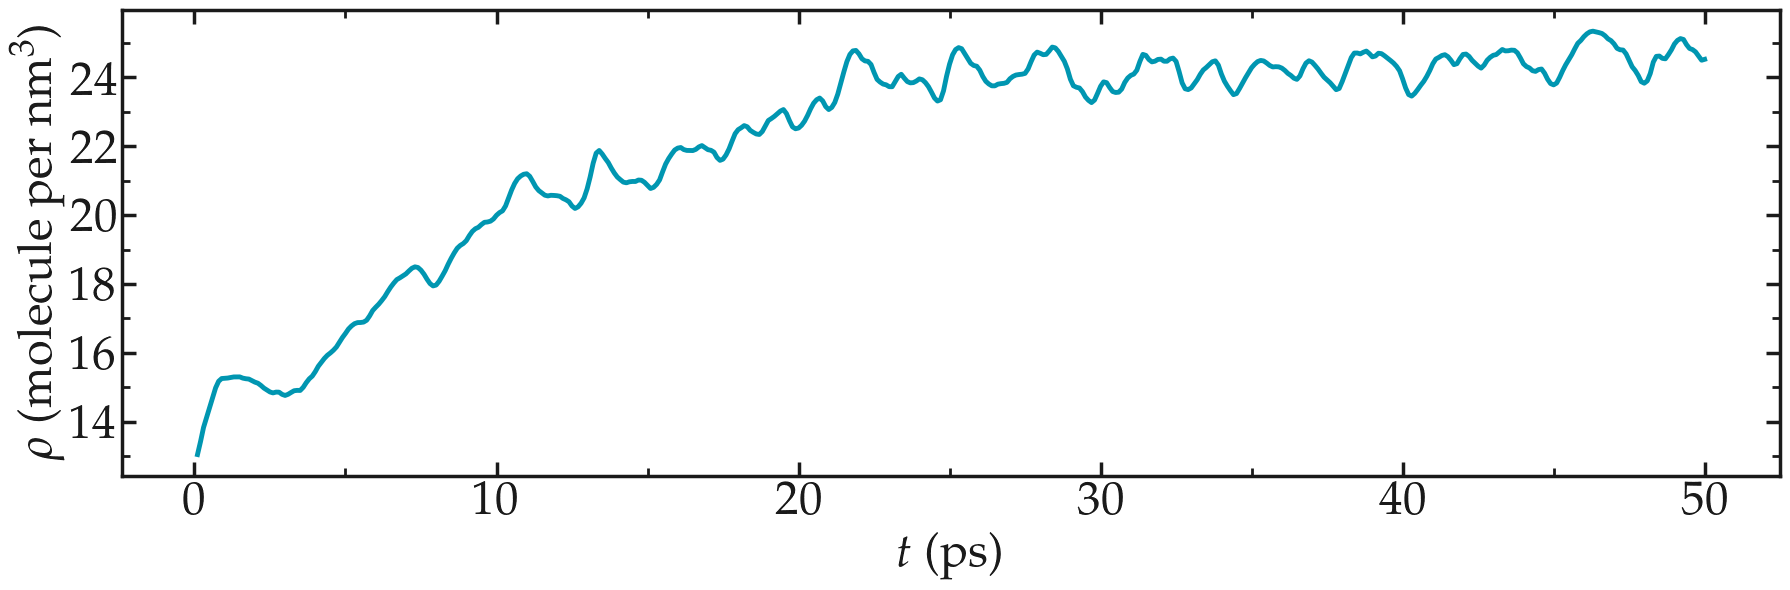

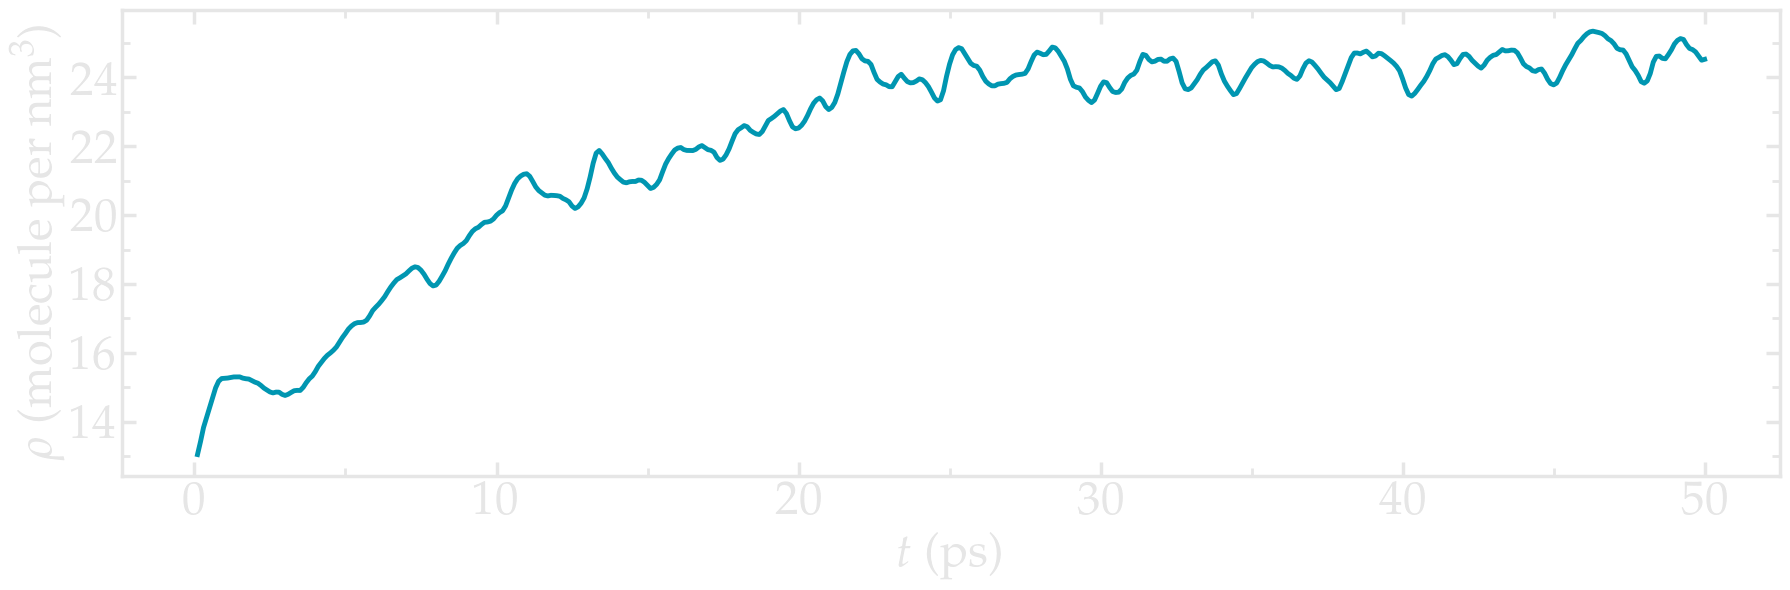

In [11]:
filename = "density_H2O"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    #ax[-1].plot(time_0, energy_0, '--', color=mygray, linewidth=3.5)
    ax[-1].plot(time, density, color=colors["myblue"], linewidth=3.5)
    complete_panel(ax[-1], r'$t$ (ps)', r'$\rho$ (molecule per nm$^3$)', legend=False, axis_color=mygray)
    ##set_boundaries(plt, x_ticks=np.arange(0, 160, 50), y_ticks=np.arange(-5500, -3500, 500),
    #               x_boundaries=(-10, 160), y_boundaries=(-5500, -4000))
    save_figure(fig, mode, git_path, path_figures, filename)